In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

<font size=5>An Overview and Analysis to the Philosophy Development History</font>

Philosophy is an important subject in human history. It's about philosophers' views about how they think of the world. And the fruit of their wisdom was spread by paper and voice till today. There is a dataset called "History of Philosophy", which contains lots of quotes from different philosophers. Here is the source of data: https://www.kaggle.com/kouroshalizadeh/history-of-philosophy. In this project, I am going to explore this dataset and find something interesting to show my readers.

In [2]:
phil_data= pd.read_csv("D:\semester2\Data science\Data\philosophy_data.csv")
print(phil_data)

                         title author    school  \
0       Plato - Complete Works  Plato     plato   
1       Plato - Complete Works  Plato     plato   
2       Plato - Complete Works  Plato     plato   
3       Plato - Complete Works  Plato     plato   
4       Plato - Complete Works  Plato     plato   
...                        ...    ...       ...   
360803  Women, Race, And Class  Davis  feminism   
360804  Women, Race, And Class  Davis  feminism   
360805  Women, Race, And Class  Davis  feminism   
360806  Women, Race, And Class  Davis  feminism   
360807  Women, Race, And Class  Davis  feminism   

                                           sentence_spacy  \
0        What's new, Socrates, to make you leave your ...   
1       Surely you are not prosecuting anyone before t...   
2       The Athenians do not call this a prosecution b...   
3                                   What is this you say?   
4       Someone must have indicted you, for you are no...   
...                  

After downloading and reading the data, we can see that there are over 36 thousand pieces of data in this dataset. It's quite a huge number. I'm sure many funny things are hidden there.

<font size=4>The development of philosophy</font>

In [3]:
# counting unique values
n =pd.unique(phil_data['school'])
  
print(n)

['plato' 'aristotle' 'empiricism' 'rationalism' 'analytic' 'continental'
 'phenomenology' 'german_idealism' 'communism' 'capitalism' 'stoicism'
 'nietzsche' 'feminism']


As we can see, I counted the school of the whole dataset, it shows that during the philosophy development history, there are 13 different kinds of schools appeared. Now we are going to check its development by finding the mainstream school of each age, based on each quote's publication date.

In [4]:
phil_sorted_school = phil_data.sort_values("original_publication_date")
print(phil_sorted_school)

                         title author    school  \
0       Plato - Complete Works  Plato     plato   
25574   Plato - Complete Works  Plato     plato   
25575   Plato - Complete Works  Plato     plato   
25576   Plato - Complete Works  Plato     plato   
25577   Plato - Complete Works  Plato     plato   
...                        ...    ...       ...   
151501          Lewis - Papers  Lewis  analytic   
151500          Lewis - Papers  Lewis  analytic   
151499          Lewis - Papers  Lewis  analytic   
151509          Lewis - Papers  Lewis  analytic   
155745          Lewis - Papers  Lewis  analytic   

                                           sentence_spacy  \
0        What's new, Socrates, to make you leave your ...   
25574   Imagine, then, that something like the followi...   
25575   The shipowner is bigger and stronger than ever...   
25576   The sailors are quarreling with one another ab...   
25577   even though he's never learned the art of navi...   
...                  

In [5]:
left=-350
mainstream_school=[]
age=[]
while (left+100)<2100:
    #get data in 100 years
    df1=phil_sorted_school[(phil_sorted_school['original_publication_date']>=left) & (phil_sorted_school['original_publication_date']<left+100)]
    
    #count numbers of each kinds of school
    df2=df1.groupby("school")['title'].count()
    
    ##transform series to dataframe
    df3=pd.DataFrame({'school':df2.index, 'counts':df2.values})
    
    sorted_count=df3.sort_values("counts",ascending=False)

    if len(sorted_count)!=0:
        mainstream_school.append(sorted_count.iloc[0][0])
        age.append(left)
    else:
        mainstream_school.append(0)
        age.append(left)
    left+=100
    
print(mainstream_school,age)
phil_development=pd.DataFrame({'mainstream_school':mainstream_school, 'age':age})
print(phil_development)


['aristotle', 0, 0, 0, 'stoicism', 'stoicism', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 'rationalism', 'rationalism', 'german_idealism', 'phenomenology', 'analytic'] [-350, -250, -150, -50, 50, 150, 250, 350, 450, 550, 650, 750, 850, 950, 1050, 1150, 1250, 1350, 1450, 1550, 1650, 1750, 1850, 1950]
   mainstream_school   age
0          aristotle  -350
1                  0  -250
2                  0  -150
3                  0   -50
4           stoicism    50
5           stoicism   150
6                  0   250
7                  0   350
8                  0   450
9                  0   550
10                 0   650
11                 0   750
12                 0   850
13                 0   950
14                 0  1050
15                 0  1150
16                 0  1250
17                 0  1350
18                 0  1450
19       rationalism  1550
20       rationalism  1650
21   german_idealism  1750
22     phenomenology  1850
23          analytic  1950


  From the table, we can see that around B.C 350, the Aristotle is the mainstream of philosophy. After that, stoicism, rationalism, german idealism, phenomenology, analytic became the mainstream school in turn. The 0 in this table means there is no record of a quote in the certain 100 years. There is a big period between A.D 250 to A.D 1450 in which haven't any philosophy quotes appeared, that's interesting. It is about the Middle Ages which people called "the darkest hour". At that time, human cultural activities such as science, and art seemed stopped. And the loss of philosophy point is just a picture of it.

<font size=4>The development of feminism</font>

Feminism is one of the most popular schools in modern times and I'm very interested in it. So I want to explore how feminism developed.

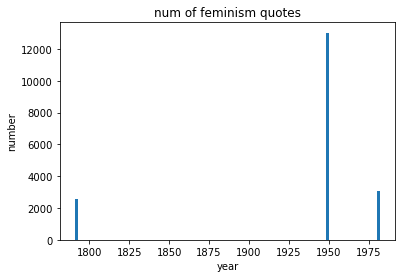

[1792, 1949, 1981] [2559, 13017, 3059]


In [6]:
df1=phil_data[(phil_data['school']=='feminism')]
df2=df1.groupby("original_publication_date")['title'].count()
df3=pd.DataFrame({'year':df2.index, 'counts':df2.values})


year = list(df3["year"])
quotes_num = list(df3["counts"])
plt.bar(year, quotes_num,width = 1.5)
plt.xlabel('year')
plt.ylabel('number')


plt.title('num of feminism quotes')

plt.show() 
print(year,quotes_num)

Here we can see that feminism originated in 1792. What happened then? The Enlightenment just happened in the 17 to 18 centuries. I think this movement caused the birth of feminism. In 1949, there is a burst of feminism quotes, which reached 13000 pieces of quotes. Modern feminism also developed in 1981. There are more than 3000 quotes were published this year.

<font size=4>Who leads the feminism and Who influenced the feminism the most?</font>

In [7]:
df1=phil_data[(phil_data['school']=='feminism')]
df2=df1[(df1['original_publication_date']==1792)]
n =pd.unique(df2['author'])
  
print(n)


['Wollstonecraft']


Wollstonecraft is the only person who publish in 1792. She is the first woman who raised the recorded feminism quotes. We can conclude that she created the feminism school.

In [8]:
df2=df1.groupby("author")['title'].count()
print(df2)

author
Beauvoir          13017
Davis              3059
Wollstonecraft     2559
Name: title, dtype: int64


From the analysis above, Beauvoir made the most quotes about feminism much more than the other two philosophers. She is a famous feminist philosopher who wrote "The Second Sex". She definitely influenced feminist development the most.

<font size=4>The topic of Beauvoir and Wollstonecraft based on their words</font>

Let's move our sights from schools to certain philosophers. I wonder if there is any relationship between the two feminists. So I'd like to explore starting with the words they said.

In [9]:
!pip install wordcloud

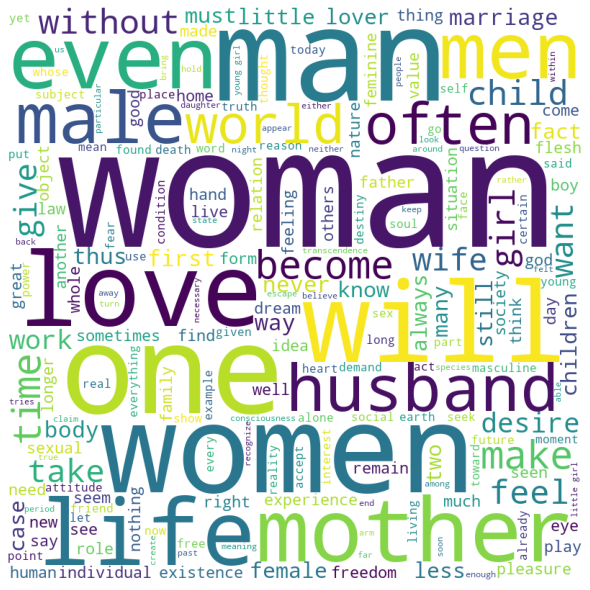

In [15]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

df2=df1[(df1['author']=='Beauvoir')]
full_words=''
for val in df2.sentence_lowered:
    tokens = val.split()
    full_words += " ".join(tokens)+" "

cloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(full_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(cloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

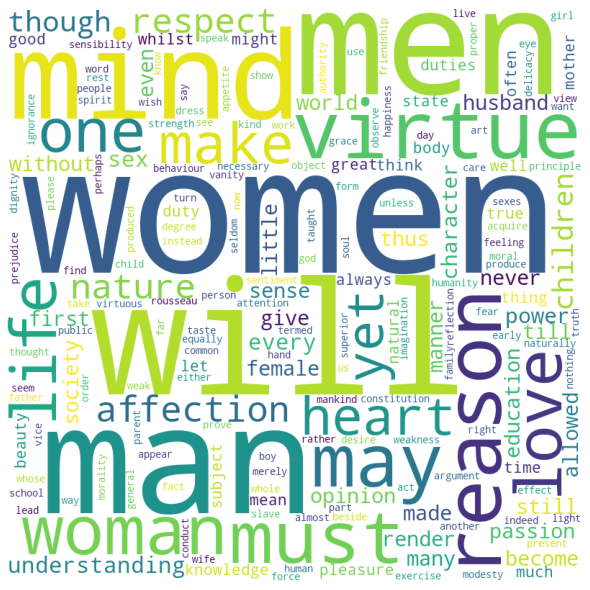

In [16]:
df2=df1[(df1['author']=='Wollstonecraft')]
full_words=''
for val in df2.sentence_lowered:
    tokens = val.split()
    full_words += " ".join(tokens)+" "

cloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(full_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(cloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

Based on the word cloud above, we can find that both two feminist philosophers like to speak "man", "women" in their quotes. That is the main topic they discussed. However, we can see something different between them. In the word cloud of Wollstonecraft, there are some words: 'reason', 'mind', 'life', 'make', 'affection' also appeared frequently. From these words, I think Wollstonecraft are more likely to focus on female right and open women's mind. In Beauvoir's image, I see that "mother", 'husband',' life', 'marriage' get the main position. So I can imagine that Beauvoir focuses on the relationship between man and women, and also have opinions on the family.

<font size=4>Conclusion</font>

To sum up, from the data mining and data analysis step, we find some interesting discoveries. First, we have an overview of the development of philosophy history. Then, I picked up feminism to find the key author in its development. Finally, I used word cloud to analyze Wollstonecraft and Beauvoir's topic. It tells us Wollstonecraft more concentrated on the female right but Beauvoir focused on the relationship between men and women.